# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_GMM.ipynb``` or ```1b_CreateNoiseModel_Histogram.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or if the calibration data is not available.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../../')
import unet.model
from unet.model import UNet

from pn2v import utils
from pn2v import histNoiseModel
from pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from  https://owncloud.mpi-cbg.de/index.php/s/lt3yecHQMKJnJlB/download. Here we show the pipeline for Mouse actin dataset. Save the dataset at an appropriate location. For us, the path is data folder which exists at `../../../`. For Mouse actin, the data to be denoised is named ```sample_attempt2.tif```. 

### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [2]:
path='../../../data/Mouse actin/'
fileName='sample_attempt2.tif'
dataName='mouseactin' # This will be used to name the noise2void model

Run the cells below

In [3]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.

In [4]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

../../unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
../../unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)
/home/lalit/Desktop/01_Softwares/anaconda3/envs/ppn2vEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


Epoch 0 finished      
avg. loss: 0.37949139922857283+-(2SEM)0.15545642071171648      
Epoch 1 finished      
avg. loss: 0.33856241405010223+-(2SEM)0.13122698512355535      
Epoch 2 finished      
avg. loss: 0.3287083752453327+-(2SEM)0.13026046956500048      
Epoch 3 finished      
avg. loss: 0.3159226093441248+-(2SEM)0.12954614069012188      
Epoch 4 finished      
avg. loss: 0.34577273577451706+-(2SEM)0.12025066609650015      
Epoch 5 finished      
avg. loss: 0.40049523636698725+-(2SEM)0.12993502580039545      
Epoch 6 finished      
avg. loss: 0.28424852676689627+-(2SEM)0.10754407568471624      
Epoch 7 finished      
avg. loss: 0.1906615674495697+-(2SEM)0.04747254668392225      
Epoch 8 finished      
avg. loss: 0.31544647552073+-(2SEM)0.11731221051528501      
Epoch 9 finished      
avg. loss: 0.24756160452961923+-(2SEM)0.08556405314927391      
Epoch 10 finished      
avg. loss: 0.3179824385792017+-(2SEM)0.13501874788027088      
Epoch 11 finished      
avg. loss: 0.286130958795

Epoch 90 finished      
avg. loss: 0.3008340038359165+-(2SEM)0.0981863681069088      
Epoch 91 finished      
avg. loss: 0.29412442781031134+-(2SEM)0.1343727462026231      
Epoch 92 finished      
avg. loss: 0.3040745295584202+-(2SEM)0.09998229051635611      
Epoch 93 finished      
avg. loss: 0.28669285885989665+-(2SEM)0.10667934319128297      
Epoch 94 finished      
avg. loss: 0.20194808542728424+-(2SEM)0.09641469607308992      
Epoch 95 finished      
avg. loss: 0.36882989555597306+-(2SEM)0.11326728980864602      
Epoch 96 finished      
avg. loss: 0.17150961495935918+-(2SEM)0.038876242183824565      
Epoch    96: reducing learning rate of group 0 to 7.8125e-06.
Epoch 97 finished      
avg. loss: 0.3651504382491112+-(2SEM)0.146127651156917      
Epoch 98 finished      
avg. loss: 0.2316967945545912+-(2SEM)0.10160292972547927      
Epoch 99 finished      
avg. loss: 0.24697926118969918+-(2SEM)0.0837419885235261      
Epoch 100 finished      
avg. loss: 0.349759791046381+-(2SEM)0.112

avg. loss: 0.37829437777400016+-(2SEM)0.12139487346607525      
Epoch 178 finished      
avg. loss: 0.20336277186870574+-(2SEM)0.07807509695600565      
Epoch 179 finished      
avg. loss: 0.2985733047127724+-(2SEM)0.10761739785628256      
Epoch 180 finished      
avg. loss: 0.2346111960709095+-(2SEM)0.07319510498942802      
Epoch 181 finished      
avg. loss: 0.41744594983756544+-(2SEM)0.13974117377765372      
Epoch 182 finished      
avg. loss: 0.21874476186931133+-(2SEM)0.07160036670764366      
Epoch 183 finished      
avg. loss: 0.2511761836707592+-(2SEM)0.10995739702389995      
Epoch 184 finished      
avg. loss: 0.276618055999279+-(2SEM)0.1001944455220877      
Epoch   184: reducing learning rate of group 0 to 3.0518e-08.
Epoch 185 finished      
avg. loss: 0.31122685931622984+-(2SEM)0.12210437794904004      
Epoch 186 finished      
avg. loss: 0.2363278180360794+-(2SEM)0.10697797512471163      
Epoch 187 finished      
avg. loss: 0.325231696292758+-(2SEM)0.12717767813819206

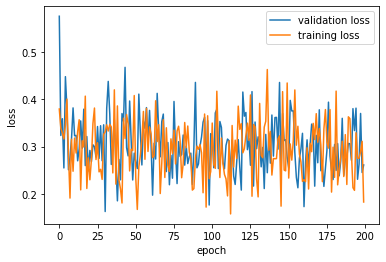

In [5]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()